In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.datasets.samples_generator import make_blobs

style.use('ggplot')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
class MeanShift:
    
    def __init__(self, radius = None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self, data):
        centroids = {}
        
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis = 0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            
            self.radius = all_data_norm / self.radius_norm_step
            
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            
            for i in centroids:
                in_radius = []
                
                centroid = centroids[i]
                
                weights = [i for i in range(self.radius_norm_step)][::-1]
                
                for feature_set in data:
                    distances = np.linalg.norm(feature_set - centroid)
                    
                    if distances == 0:
                        distances = 0.000000001
                        
                    weight_index = int(distances / self.radius)
                    
                    if weight_index > (self.radius_norm_step - 1):
                        weight_index = self.radius_norm_step - 1
                        
                    to_add = (weights[weight_index] ** 2) * [feature_set]
                    in_radius += to_add
                        
                new_centroid = np.average(in_radius, axis = 0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for i in uniques:
                for j in uniques:
                    
                    if i == j:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(j)) <= self.radius:
                        to_pop.append(j)
                        break
            
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                        
            prev_centroids = dict(centroids)
            
            centroids = {}
            
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                    
                if not optimized:
                    break
                    
            if optimized:
                break
                
        self.centroids = centroids
        
        self.clustering = {}
        
        for i in range(len(self.centroids)):
            self.clustering[i] = []
            
        for feature_set in data:
            distances = [np.linalg.norm(feature_set - self.centroids[centroid]) for centroid in self.centroids]
            
            cluster = distances.index(min(distances))
            
            self.clustering[cluster].append(feature_set)
    
    def predict(self, data):
        distances = [np.linalg.norm(feature_set - self.centroids[centroid]) for centroid in self.centroids]
            
        cluster = distances.index(min(distances))
            
        self.clustering[cluster].append(feature_set)
        
        return cluster

In [9]:
X, y = make_blobs(n_samples = 20, centers = 3, n_features = 2)

colors = 10 * ['g', 'r', 'c', 'b', 'k']

In [10]:
mean_shift = MeanShift()

In [11]:
mean_shift.fit(X)

In [12]:
centroids = mean_shift.centroids

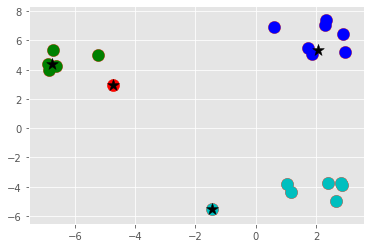

In [13]:
plt.scatter(X[:, 0], X[:, 1], s = 150)

for cluster in mean_shift.clustering:
    color = colors[cluster]
    
    for feature_set in mean_shift.clustering[cluster]:
        plt.scatter(feature_set[0], feature_set[1], color = color, s = 50, linewidth = 5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)
    
plt.show()